          A         B         C         D  DR OF FCF***  Clase
0  0.014323 -0.002537  0.003601 -0.012156     36.326959      0
1 -0.355424  0.303163 -0.035295  0.004104    831.225383      0
2  0.030872 -0.001226 -0.006301  0.001334     14.788910      1
3 -0.061181  0.047204  0.002714 -0.004636    134.497738      0
4 -0.103156  0.043716  0.072599 -0.015455    448.189591      1
0    450
1    426
Name: Clase, dtype: int64
Training Features Shape: (613, 5)
Training Labels Shape: (613,)
Testing Features Shape: (263, 5)
Testing Labels Shape: (263,)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


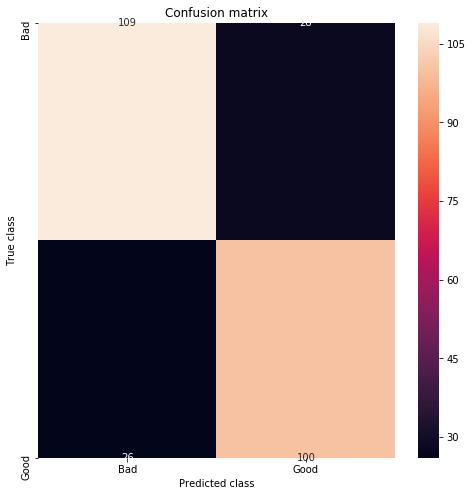

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       137
           1       0.78      0.79      0.79       126

    accuracy                           0.79       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.79      0.79      0.79       263

0.9044143204727146


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

LABELS = ["Bad","Good"]

#Confusion Matrix
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))


# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv("Dataset-de-empresas.csv")
print(features.head(5))
#print('The shape of our features is:', features.shape)
print(pd.value_counts(features['Clase'], sort = True))

# Descriptive statistics for each column
# print(features.describe())

# Labels are the values we want to predict
labels = np.array(features['Clase'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Clase', axis = 1)


# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3,random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Crear el modelo con 100 arboles
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')

# Train the model on training data
model.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = model.predict(test_features)

# Probabilities for each class
rf_probs = model.predict_proba(test_features)[:, 1]
#print(rf_probs)

#Confusion Matrix
mostrar_resultados(test_labels, predictions)

# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

print(roc_value)

